# Project 1

## Q1

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sherylmehta/kodak-dataset")

print("Path to dataset files:", path)

100%|██████████| 14.7M/14.7M [00:00<00:00, 50.2MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/sherylmehta/kodak-dataset/versions/1


Loading MNIST dataset...


Testing configurations:   0%|          | 0/45 [00:00<?, ?it/s]

Training:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/10 [00:00<?, ?it/s]

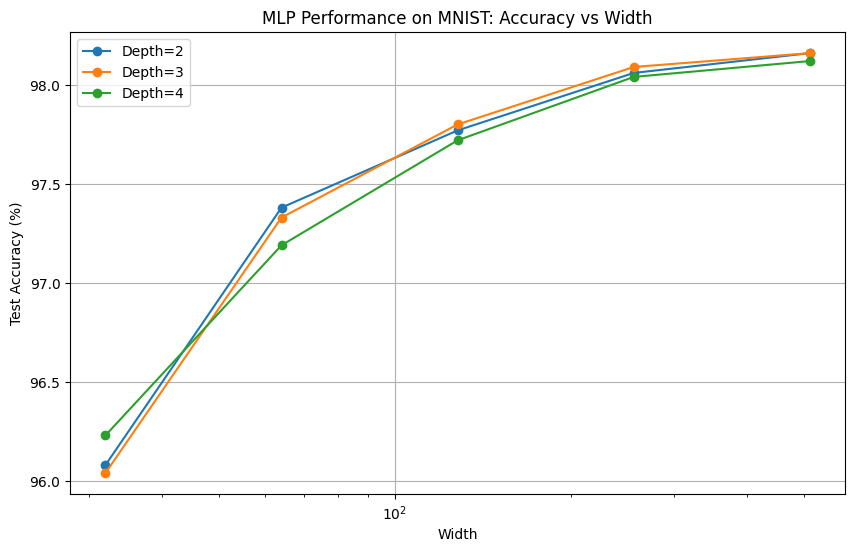

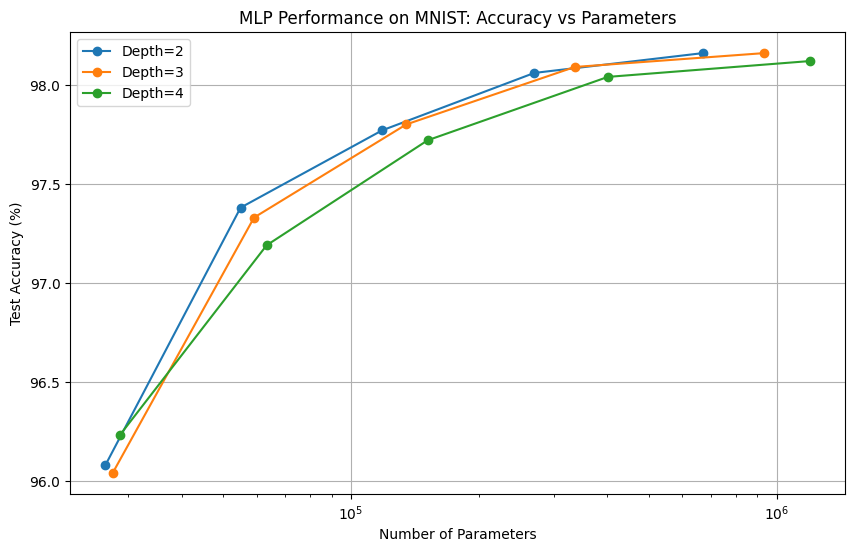

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
from typing import List, Tuple
import time
from tqdm.auto import tqdm, trange

class MLP(nn.Module):
    def __init__(self, input_dim: int, hidden_dims: List[int], output_dim: int):
        super(MLP, self).__init__()

        # Build layers dynamically based on hidden_dims
        layers = []
        prev_dim = input_dim

        for hidden_dim in hidden_dims:
            layers.append(nn.Linear(prev_dim, hidden_dim))
            layers.append(nn.ReLU())
            prev_dim = hidden_dim

        layers.append(nn.Linear(prev_dim, output_dim))

        self.network = nn.Sequential(*layers)

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten input
        return self.network(x)

def count_parameters(model: nn.Module) -> int:
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

def train_model(model: nn.Module,
                train_loader: DataLoader,
                val_loader: DataLoader,
                epochs: int = 10,
                device: str = 'cuda' if torch.cuda.is_available() else 'cpu') -> Tuple[float, float]:

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters())
    model = model.to(device)

    best_val_acc = 0.0

    # Progress bar for epochs
    pbar = trange(epochs, desc='Training')

    for epoch in pbar:
        # Training
        model.train()
        train_loss = 0.0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()

        # Validation
        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        val_acc = 100 * correct / total
        if val_acc > best_val_acc:
            best_val_acc = val_acc

        # Update progress bar description with metrics
        pbar.set_description(f'Loss: {train_loss/len(train_loader):.4f}, Acc: {val_acc:.2f}%')

    return best_val_acc

def run_experiment(depths: List[int],
                  widths: List[int],
                  input_dim: int,
                  output_dim: int,
                  num_trials: int = 3) -> dict:

    print("Loading MNIST dataset...")
    transform = transforms.Compose([transforms.ToTensor()])

    trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform)
    testset = torchvision.datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transform)

    train_loader = DataLoader(trainset, batch_size=128, shuffle=True)
    test_loader = DataLoader(testset, batch_size=128, shuffle=False)

    results = {
        'depths': depths,
        'widths': widths,
        'accuracies': np.zeros((len(depths), len(widths), num_trials)),
        'parameters': np.zeros((len(depths), len(widths)))
    }

    # Total number of configurations to test
    total_configs = len(depths) * len(widths) * num_trials

    # Main progress bar for all configurations
    with tqdm(total=total_configs, desc="Testing configurations") as pbar:
        for i, depth in enumerate(depths):
            for j, width in enumerate(widths):
                hidden_dims = [width] * depth

                # Count parameters
                model = MLP(input_dim, hidden_dims, output_dim)
                results['parameters'][i,j] = count_parameters(model)

                # Run multiple trials
                for trial in range(num_trials):
                    config_desc = f"Depth={depth}, Width={width}, Trial={trial+1}/{num_trials}"
                    pbar.set_description(f"Testing {config_desc}")

                    model = MLP(input_dim, hidden_dims, output_dim)
                    acc = train_model(model, train_loader, test_loader)
                    results['accuracies'][i,j,trial] = acc

                    pbar.update(1)
                    pbar.set_postfix({'Last Acc': f'{acc:.2f}%'})

    return results

def plot_results(results: dict):
    depths = results['depths']
    widths = results['widths']

    # Calculate median accuracies across trials
    median_accuracies = np.median(results['accuracies'], axis=2)

    # Plot accuracy vs width for each depth
    plt.figure(figsize=(10, 6))
    for i, depth in enumerate(depths):
        plt.plot(widths, median_accuracies[i], marker='o', label=f'Depth={depth}')

    plt.xscale('log')
    plt.xlabel('Width')
    plt.ylabel('Test Accuracy (%)')
    plt.title('MLP Performance on MNIST: Accuracy vs Width')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot accuracy vs parameters
    plt.figure(figsize=(10, 6))
    for i, depth in enumerate(depths):
        plt.plot(results['parameters'][i], median_accuracies[i],
                marker='o', label=f'Depth={depth}')

    plt.xscale('log')
    plt.xlabel('Number of Parameters')
    plt.ylabel('Test Accuracy (%)')
    plt.title('MLP Performance on MNIST: Accuracy vs Parameters')
    plt.legend()
    plt.grid(True)
    plt.show()

# Run the experiment
if __name__ == "__main__":
    depths = [2, 3, 4]
    widths = [32, 64, 128, 256, 512]
    input_dim = 28 * 28  # MNIST image size
    output_dim = 10      # Number of classes

    results = run_experiment(depths, widths, input_dim, output_dim, num_trials=3)
    plot_results(results)

In [ ]:
print(results)

{'depths': [2, 3, 4], 'widths': [32, 64, 128, 256, 512], 'accuracies': array([[[96.28, 96.08, 95.95],
        [97.13, 97.59, 97.38],
        [97.69, 97.77, 97.92],
        [98.07, 97.94, 98.06],
        [98.14, 98.19, 98.16]],

       [[96.04, 96.42, 95.96],
        [97.4 , 97.22, 97.33],
        [97.97, 97.75, 97.8 ],
        [97.92, 98.13, 98.09],
        [98.16, 98.09, 98.17]],

       [[96.23, 96.38, 96.02],
        [97.19, 97.44, 97.14],
        [97.79, 97.62, 97.72],
        [98.04, 98.01, 98.19],
        [98.03, 98.14, 98.12]]]), 'parameters': array([[  26506.,   55050.,  118282.,  269322.,  669706.],
       [  27562.,   59210.,  134794.,  335114.,  932362.],
       [  28618.,   63370.,  151306.,  400906., 1195018.]])}


## Q2

Loading MNIST dataset...
Training generators...


Training Generator (k=32, d=1600):   0%|          | 0/10000 [00:00<?, ?it/s]

Training Generator (k=8, d=1600):   0%|          | 0/10000 [00:00<?, ?it/s]

Testing configurations:   0%|          | 0/24 [00:00<?, ?it/s]

D=2 W=32 R=50 T=1/3:   0%|          | 0/10 [00:00<?, ?it/s]

D=2 W=32 R=50 T=2/3:   0%|          | 0/10 [00:00<?, ?it/s]

D=2 W=32 R=50 T=3/3:   0%|          | 0/10 [00:00<?, ?it/s]

D=2 W=32 R=200 T=1/3:   0%|          | 0/10 [00:00<?, ?it/s]

D=2 W=32 R=200 T=2/3:   0%|          | 0/10 [00:00<?, ?it/s]

D=2 W=32 R=200 T=3/3:   0%|          | 0/10 [00:00<?, ?it/s]

D=2 W=64 R=50 T=1/3:   0%|          | 0/10 [00:00<?, ?it/s]

D=2 W=64 R=50 T=2/3:   0%|          | 0/10 [00:00<?, ?it/s]

D=2 W=64 R=50 T=3/3:   0%|          | 0/10 [00:00<?, ?it/s]

D=2 W=64 R=200 T=1/3:   0%|          | 0/10 [00:00<?, ?it/s]

D=2 W=64 R=200 T=2/3:   0%|          | 0/10 [00:00<?, ?it/s]

D=2 W=64 R=200 T=3/3:   0%|          | 0/10 [00:00<?, ?it/s]

D=4 W=32 R=50 T=1/3:   0%|          | 0/10 [00:00<?, ?it/s]

D=4 W=32 R=50 T=2/3:   0%|          | 0/10 [00:00<?, ?it/s]

D=4 W=32 R=50 T=3/3:   0%|          | 0/10 [00:00<?, ?it/s]

D=4 W=32 R=200 T=1/3:   0%|          | 0/10 [00:00<?, ?it/s]

D=4 W=32 R=200 T=2/3:   0%|          | 0/10 [00:00<?, ?it/s]

D=4 W=32 R=200 T=3/3:   0%|          | 0/10 [00:00<?, ?it/s]

D=4 W=64 R=50 T=1/3:   0%|          | 0/10 [00:00<?, ?it/s]

D=4 W=64 R=50 T=2/3:   0%|          | 0/10 [00:00<?, ?it/s]

D=4 W=64 R=50 T=3/3:   0%|          | 0/10 [00:00<?, ?it/s]

D=4 W=64 R=200 T=1/3:   0%|          | 0/10 [00:00<?, ?it/s]

D=4 W=64 R=200 T=2/3:   0%|          | 0/10 [00:00<?, ?it/s]

D=4 W=64 R=200 T=3/3:   0%|          | 0/10 [00:00<?, ?it/s]

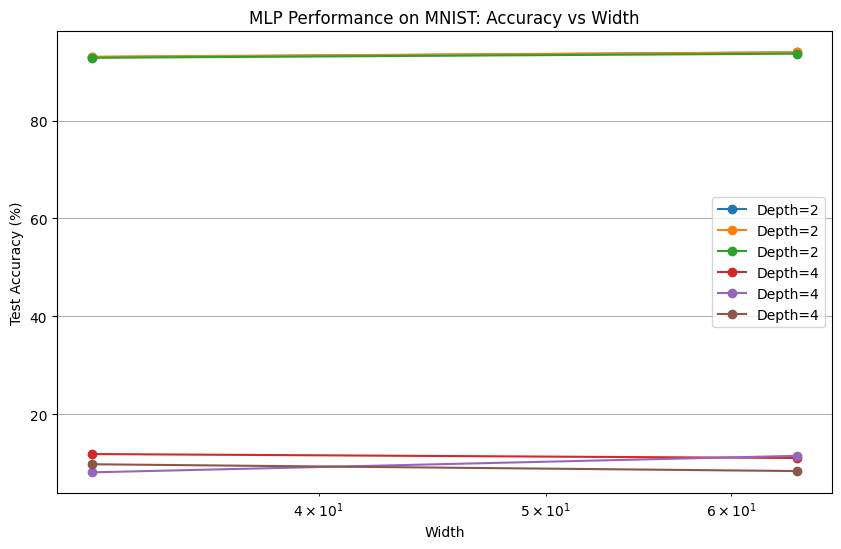

KeyError: 'parameters'

<Figure size 1000x600 with 0 Axes>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision
import torchvision.transforms as transforms
import numpy as np
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
import time
from collections import defaultdict


class Generator(nn.Module):
    """Generator network that maps from low-dimensional space to hypersphere."""

    def __init__(self, input_dim: int, output_dim: int, hidden_dim: int = 256):
        super(Generator, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.SiLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.SiLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.SiLU(),
            nn.Linear(hidden_dim, output_dim),
        )

    def forward(self, x):
        x = self.net(x)
        return x / torch.norm(x, dim=-1, keepdim=True)  # Project to hypersphere


class CompressedLinear(nn.Module):
    """Linear layer using MCNC compression."""

    def __init__(
        self,
        in_features: int,
        out_features: int,
        generator: nn.Module,
        k: int,
        d: int,
        m: int = 1,
        L: float = 20.0,
    ):
        super(CompressedLinear, self).__init__()
        self.in_features = in_features
        self.out_features = out_features
        self.generator = generator
        self.k = k
        self.d = d
        self.m = m
        self.L = L

        # Parameters for compression
        self.alphas = nn.Parameter(torch.randn(m, k) * 0.02)
        self.betas = nn.Parameter(torch.randn(m) * 0.02)

        # Calculate number of chunks needed
        total_params = in_features * out_features
        self.n_chunks = (total_params + d - 1) // d

    def forward(self, x):
        # Reconstruct weight matrix
        weight = torch.zeros(self.in_features * self.out_features, device=x.device)

        for chunk in range(self.n_chunks):
            start_idx = chunk * self.d
            end_idx = min((chunk + 1) * self.d, weight.shape[0])

            # Generate basis vectors for this chunk
            chunk_weights = torch.zeros(end_idx - start_idx, device=x.device)
            for i in range(self.m):
                alpha = torch.clamp(self.alphas[i], -self.L, self.L)
                basis = self.generator(alpha.unsqueeze(0)).squeeze(0)[
                    : end_idx - start_idx
                ]
                chunk_weights += self.betas[i] * basis

            weight[start_idx:end_idx] = chunk_weights

        weight = weight.view(self.out_features, self.in_features)
        return torch.nn.functional.linear(x, weight)


class CompressedMLP(nn.Module):
    """MLP using MCNC compressed linear layers."""

    def __init__(
        self,
        input_dim: int,
        hidden_dims: list,
        output_dim: int,
        generator: nn.Module,
        k: int,
        d: int,
        m: int = 1,
        L: float = 20.0,
    ):
        super(CompressedMLP, self).__init__()

        layers = []
        prev_dim = input_dim

        for hidden_dim in hidden_dims:
            layers.append(CompressedLinear(prev_dim, hidden_dim, generator, k, d, m, L))
            layers.append(nn.ReLU())
            prev_dim = hidden_dim

        layers.append(CompressedLinear(prev_dim, output_dim, generator, k, d, m, L))

        self.network = nn.Sequential(*layers)

    def forward(self, x):
        x = x.view(x.size(0), -1)
        return self.network(x)


class TeacherMLP(nn.Module):
    """Standard MLP to be used as teacher model."""

    def __init__(self, input_dim: int, hidden_dims: list, output_dim: int):
        super(TeacherMLP, self).__init__()

        layers = []
        prev_dim = input_dim

        for hidden_dim in hidden_dims:
            layers.append(nn.Linear(prev_dim, hidden_dim))
            layers.append(nn.ReLU())
            prev_dim = hidden_dim

        layers.append(nn.Linear(prev_dim, output_dim))

        self.network = nn.Sequential(*layers)

    def forward(self, x):
        x = x.view(x.size(0), -1)
        return self.network(x)


def train_generator(
    k: int,
    d: int,
    batch_size: int = 4096,
    n_iterations: int = 10000,
    device: str = "cuda",
):
    """Train the generator to map uniform distribution to hypersphere."""
    generator = Generator(k, d).to(device)
    optimizer = optim.Adam(generator.parameters(), lr=1e-4)

    # Single progress bar for generator training
    pbar = tqdm(
        range(n_iterations), desc=f"Training Generator (k={k}, d={d})", leave=False
    )

    running_loss = 0
    for i in pbar:
        # Sample from source and target distributions
        alpha = (torch.rand(batch_size, k, device=device) * 2 - 1) * 20
        target = torch.randn(batch_size, d, device=device)
        target = target / torch.norm(target, dim=1, keepdim=True)

        # Generate samples and compute loss
        generated = generator(alpha)
        loss = torch.mean((generated - target) ** 2)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Update running loss and progress bar less frequently
        running_loss = 0.9 * running_loss + 0.1 * loss.item()
        if i % 100 == 0:
            pbar.set_postfix({"loss": f"{running_loss:.4f}"})

    return generator


def train_model(
    model: nn.Module,
    train_loader: DataLoader,
    val_loader: DataLoader,
    epochs: int = 10,
    device: str = "cuda",
    desc: str = "",
) -> float:
    """Train model and return best validation accuracy."""
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    best_val_acc = 0.0
    train_stats = defaultdict(float)

    # Single progress bar for all epochs
    pbar = tqdm(range(epochs), desc=desc, leave=False)

    for epoch in pbar:
        model.train()
        train_loss = 0.0

        # Training without inner progress bar
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()

        # Validation without progress bar
        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                _, predicted = outputs.max(1)
                total += labels.size(0)
                correct += predicted.eq(labels).sum().item()

        val_acc = 100.0 * correct / total
        best_val_acc = max(best_val_acc, val_acc)

        # Update progress bar less frequently
        if epoch % 2 == 0:
            pbar.set_postfix(
                {
                    "loss": f"{train_loss/len(train_loader):.4f}",
                    "acc": f"{val_acc:.2f}%",
                }
            )

    return best_val_acc


def run_experiment(
    depths: list,
    widths: list,
    compression_rates: list,
    input_dim: int = 784,
    output_dim: int = 10,
    num_trials: int = 3,
    device: str = "cuda",
):
    """Run compression experiments with different architectures and rates."""
    # Load MNIST once
    print("Loading MNIST dataset...")
    transform = transforms.Compose([transforms.ToTensor()])
    trainset = torchvision.datasets.MNIST(
        root="./data", train=True, download=True, transform=transform
    )
    testset = torchvision.datasets.MNIST(
        root="./data", train=False, download=True, transform=transform
    )

    train_loader = DataLoader(trainset, batch_size=128, shuffle=True)
    test_loader = DataLoader(testset, batch_size=128, shuffle=False)

    results = {
        "depths": depths,
        "widths": widths,
        "compression_rates": compression_rates,
        "accuracies": np.zeros(
            (len(depths), len(widths), len(compression_rates), num_trials)
        ),
    }

    # Cache generators for each compression rate
    print("Training generators...")
    generators = {}
    d = 1600  # Fixed d value
    for rate in compression_rates:
        k = int(d / rate)
        generators[rate] = train_generator(k, d, device=device)

    # Single main progress bar for overall progress
    total_configs = len(depths) * len(widths) * len(compression_rates) * num_trials
    main_pbar = tqdm(total=total_configs, desc="Testing configurations")

    start_time = time.time()
    for i, depth in enumerate(depths):
        for j, width in enumerate(widths):
            hidden_dims = [width] * depth

            for l, rate in enumerate(compression_rates):
                k = int(d / rate)
                generator = generators[rate]

                for trial in range(num_trials):
                    config_desc = (
                        f"D={depth} W={width} R={rate} T={trial+1}/{num_trials}"
                    )

                    model = CompressedMLP(
                        input_dim, hidden_dims, output_dim, generator, k, d, m=1
                    ).to(device)

                    acc = train_model(
                        model, train_loader, test_loader, desc=config_desc
                    )
                    results["accuracies"][i, j, l, trial] = acc

                    # Update main progress bar
                    main_pbar.update(1)
                    elapsed = time.time() - start_time
                    configs_done = main_pbar.n
                    configs_left = total_configs - configs_done
                    time_per_config = elapsed / configs_done
                    eta = time_per_config * configs_left / 60  # minutes

                    main_pbar.set_postfix(
                        {"acc": f"{acc:.2f}%", "ETA": f"{eta:.1f}min"}
                    )

    main_pbar.close()
    return results


def plot_results(results: dict):
    depths = results["depths"]
    widths = results["widths"]

    # Calculate median accuracies across trials
    median_accuracies = np.median(results["accuracies"], axis=2)

    # Plot accuracy vs width for each depth
    plt.figure(figsize=(10, 6))
    for i, depth in enumerate(depths):
        plt.plot(widths, median_accuracies[i], marker="o", label=f"Depth={depth}")

    plt.xscale("log")
    plt.xlabel("Width")
    plt.ylabel("Test Accuracy (%)")
    plt.title("MLP Performance on MNIST: Accuracy vs Width")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot accuracy vs parameters
    plt.figure(figsize=(10, 6))
    for i, depth in enumerate(depths):
        plt.plot(
            results["parameters"][i],
            median_accuracies[i],
            marker="o",
            label=f"Depth={depth}",
        )

    plt.xscale("log")
    plt.xlabel("Number of Parameters")
    plt.ylabel("Test Accuracy (%)")
    plt.title("MLP Performance on MNIST: Accuracy vs Parameters")
    plt.legend()
    plt.grid(True)
    plt.show()


if __name__ == "__main__":
    # Example usage
    depths = [2, 4] # [2, 3, 4]
    widths = [32, 64] # [32, 64, 128, 256, 512]
    compression_rates = [50, 200] # [50, 100, 200]  # d/k ratios

    results = run_experiment(depths, widths, compression_rates, num_trials=3)
    plot_results(results)


In [ ]:
import numpy as np

def analyze_results(results):
    """
    Analyze MCNC experiment results and print insights.

    Args:
        results: Dictionary containing experiment results with keys:
                'depths', 'widths', 'compression_rates', 'accuracies'
    """
    depths = results['depths']
    widths = results['widths']
    rates = results['compression_rates']
    accs = results['accuracies']

    print("MCNC Experiment Analysis")
    print("=" * 50)

    # Calculate median accuracies across trials
    median_accs = np.median(accs, axis=-1)

    # Best overall configuration
    best_idx = np.unravel_index(np.argmax(median_accs), median_accs.shape)
    best_depth = depths[best_idx[0]]
    best_width = widths[best_idx[1]]
    best_rate = rates[best_idx[2]]
    best_acc = median_accs[best_idx]

    print("\nBest Configuration:")
    print(f"Depth: {best_depth}")
    print(f"Width: {best_width}")
    print(f"Compression Rate: {best_rate}")
    print(f"Median Accuracy: {best_acc:.2f}%")

    # Analysis by depth
    print("\nAnalysis by Depth:")
    for i, depth in enumerate(depths):
        depth_accs = median_accs[i]
        print(f"\nDepth {depth}:")
        print(f"  Mean Accuracy: {np.mean(depth_accs):.2f}%")
        print(f"  Max Accuracy: {np.max(depth_accs):.2f}%")
        print(f"  Min Accuracy: {np.min(depth_accs):.2f}%")
        print(f"  Std Deviation: {np.std(depth_accs):.2f}%")

    # Analysis by width
    print("\nAnalysis by Width:")
    for i, width in enumerate(widths):
        width_accs = median_accs[:,i,:]
        print(f"\nWidth {width}:")
        print(f"  Mean Accuracy: {np.mean(width_accs):.2f}%")
        print(f"  Max Accuracy: {np.max(width_accs):.2f}%")
        print(f"  Min Accuracy: {np.min(width_accs):.2f}%")
        print(f"  Std Deviation: {np.std(width_accs):.2f}%")

    # Analysis by compression rate
    print("\nAnalysis by Compression Rate:")
    for i, rate in enumerate(rates):
        rate_accs = median_accs[:,:,i]
        print(f"\nRate {rate}:")
        print(f"  Mean Accuracy: {np.mean(rate_accs):.2f}%")
        print(f"  Max Accuracy: {np.max(rate_accs):.2f}%")
        print(f"  Min Accuracy: {np.min(rate_accs):.2f}%")
        print(f"  Std Deviation: {np.std(rate_accs):.2f}%")

    # Stability analysis (variance across trials)
    print("\nStability Analysis (Std Across Trials):")
    trial_std = np.std(accs, axis=-1)
    print(f"Mean Std Across All Configs: {np.mean(trial_std):.3f}")
    print(f"Max Std Across All Configs: {np.max(trial_std):.3f}")
    print(f"Min Std Across All Configs: {np.min(trial_std):.3f}")

    # Find most stable configuration
    stable_idx = np.unravel_index(np.argmin(trial_std), trial_std.shape)
    print("\nMost Stable Configuration:")
    print(f"Depth: {depths[stable_idx[0]]}")
    print(f"Width: {widths[stable_idx[1]]}")
    print(f"Compression Rate: {rates[stable_idx[2]]}")
    print(f"Standard Deviation: {trial_std[stable_idx]:.3f}")
    print(f"Median Accuracy: {median_accs[stable_idx]:.2f}%")

# Example usage
results = {
    'depths': [2, 4],
    'widths': [32, 64],
    'compression_rates': [50, 200],
    'accuracies': np.array([[[[93.07, 93.12, 92.7 ],
                             [92.83, 92.94, 92.91]],
                            [[93.74, 94.04, 93.21],
                             [94.08, 93.8 , 94.09]]],
                           [[[ 9.95, 9.77, 9.85],
                             [13.86, 6.57, 9.79]],
                            [[10.61, 8.88, 7.83],
                             [11.59, 14.2 , 9.04]]]])
}

analyze_results(results)

MCNC Experiment Analysis

Best Configuration:
Depth: 2
Width: 64
Compression Rate: 200
Median Accuracy: 94.08%

Analysis by Depth:

Depth 2:
  Mean Accuracy: 93.45%
  Max Accuracy: 94.08%
  Min Accuracy: 92.91%
  Std Deviation: 0.48%

Depth 4:
  Mean Accuracy: 10.03%
  Max Accuracy: 11.59%
  Min Accuracy: 8.88%
  Std Deviation: 0.98%

Analysis by Width:

Width 32:
  Mean Accuracy: 51.40%
  Max Accuracy: 93.07%
  Min Accuracy: 9.79%
  Std Deviation: 41.59%

Width 64:
  Mean Accuracy: 52.07%
  Max Accuracy: 94.08%
  Min Accuracy: 8.88%
  Std Deviation: 41.85%

Analysis by Compression Rate:

Rate 50:
  Mean Accuracy: 51.38%
  Max Accuracy: 93.74%
  Min Accuracy: 8.88%
  Std Deviation: 42.02%

Rate 200:
  Mean Accuracy: 52.09%
  Max Accuracy: 94.08%
  Min Accuracy: 9.79%
  Std Deviation: 41.41%

Stability Analysis (Std Across Trials):
Mean Std Across All Configs: 0.878
Max Std Across All Configs: 2.983
Min Std Across All Configs: 0.046

Most Stable Configuration:
Depth: 2
Width: 32
Compres

In [ ]:
print(results)

{'depths': [2, 4], 'widths': [32, 64], 'compression_rates': [50, 200], 'accuracies': array([[[[93.07, 93.12, 92.7 ],
         [92.83, 92.94, 92.91]],

        [[93.74, 94.04, 93.21],
         [94.08, 93.8 , 94.09]]],


       [[[ 9.95,  9.77,  9.85],
         [13.86,  6.57,  9.79]],

        [[10.61,  8.88,  7.83],
         [11.59, 14.2 ,  9.04]]]])}


## Q3

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision
import torchvision.transforms as transforms
import numpy as np
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
from collections import defaultdict
import time

# Original MLP for teacher model
class MLP(nn.Module):
    def __init__(self, input_dim: int, hidden_dims: list, output_dim: int):
        super(MLP, self).__init__()

        layers = []
        prev_dim = input_dim

        for hidden_dim in hidden_dims:
            layers.append(nn.Linear(prev_dim, hidden_dim))
            layers.append(nn.ReLU())
            prev_dim = hidden_dim

        layers.append(nn.Linear(prev_dim, output_dim))

        self.network = nn.Sequential(*layers)

    def forward(self, x):
        x = x.view(x.size(0), -1)
        return self.network(x)

# Generator for MCNC
class Generator(nn.Module):
    def __init__(self, input_dim: int, output_dim: int, hidden_dim: int = 256):
        super(Generator, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.SiLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.SiLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.SiLU(),
            nn.Linear(hidden_dim, output_dim),
        )

    def forward(self, x):
        x = self.net(x)
        return x / torch.norm(x, dim=-1, keepdim=True)

# Compressed linear layer using MCNC
class CompressedLinear(nn.Module):
    def __init__(self, in_features: int, out_features: int, generator: nn.Module,
                 k: int, d: int, m: int = 1, L: float = 20.0):
        super(CompressedLinear, self).__init__()
        self.in_features = in_features
        self.out_features = out_features
        self.generator = generator
        self.k = k
        self.d = d
        self.m = m
        self.L = L

        self.alphas = nn.Parameter(torch.randn(m, k) * 0.02)
        self.betas = nn.Parameter(torch.randn(m) * 0.02)

        total_params = in_features * out_features
        self.n_chunks = (total_params + d - 1) // d

    def forward(self, x):
        weight = torch.zeros(self.in_features * self.out_features,
                           device=x.device)

        for chunk in range(self.n_chunks):
            start_idx = chunk * self.d
            end_idx = min((chunk + 1) * self.d, weight.shape[0])

            chunk_weights = torch.zeros(end_idx - start_idx, device=x.device)
            for i in range(self.m):
                alpha = torch.clamp(self.alphas[i], -self.L, self.L)
                basis = self.generator(alpha.unsqueeze(0)).squeeze(0)[:end_idx-start_idx]
                chunk_weights += self.betas[i] * basis

            weight[start_idx:end_idx] = chunk_weights

        weight = weight.view(self.out_features, self.in_features)
        return F.linear(x, weight)

# Compressed MLP using MCNC
class CompressedMLP(nn.Module):
    def __init__(self, input_dim: int, hidden_dims: list, output_dim: int,
                 generator: nn.Module, k: int, d: int, m: int = 1, L: float = 20.0):
        super(CompressedMLP, self).__init__()

        layers = []
        prev_dim = input_dim

        for hidden_dim in hidden_dims:
            layers.append(CompressedLinear(prev_dim, hidden_dim, generator, k, d, m, L))
            layers.append(nn.ReLU())
            prev_dim = hidden_dim

        layers.append(CompressedLinear(prev_dim, output_dim, generator, k, d, m, L))

        self.network = nn.Sequential(*layers)

    def forward(self, x):
        x = x.view(x.size(0), -1)
        return self.network(x)

def train_generator(k: int, d: int, batch_size: int = 4096,
                   n_iterations: int = 10000, device: str = 'cuda'):
    generator = Generator(k, d).to(device)
    optimizer = optim.Adam(generator.parameters(), lr=1e-4)

    pbar = tqdm(range(n_iterations), desc=f'Training Generator (k={k}, d={d})',
                leave=False)

    running_loss = 0
    for i in pbar:
        alpha = (torch.rand(batch_size, k, device=device) * 2 - 1) * 20
        target = torch.randn(batch_size, d, device=device)
        target = target / torch.norm(target, dim=1, keepdim=True)

        generated = generator(alpha)
        loss = torch.mean((generated - target) ** 2)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss = 0.9 * running_loss + 0.1 * loss.item()
        if i % 100 == 0:
            pbar.set_postfix({'loss': f'{running_loss:.4f}'})

    return generator

def train_teacher(model: nn.Module, train_loader: DataLoader,
                 val_loader: DataLoader, epochs: int = 10,
                 device: str = 'cuda', desc: str = ''):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    best_val_acc = 0.0
    pbar = tqdm(range(epochs), desc=desc)

    for epoch in pbar:
        # Training
        model.train()
        train_loss = 0.0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()

        # Validation
        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                _, predicted = outputs.max(1)
                total += labels.size(0)
                correct += predicted.eq(labels).sum().item()

        val_acc = 100. * correct / total
        best_val_acc = max(best_val_acc, val_acc)

        pbar.set_postfix({
            'loss': f'{train_loss/len(train_loader):.4f}',
            'acc': f'{val_acc:.2f}%'
        })

    return best_val_acc

def train_student(student: nn.Module, teacher: nn.Module,
                 train_loader: DataLoader, val_loader: DataLoader,
                 temperature: float = 2.0, alpha: float = 0.5,
                 epochs: int = 10, device: str = 'cuda', desc: str = ''):

    optimizer = optim.Adam(student.parameters(), lr=0.001)
    best_val_acc = 0.0

    pbar = tqdm(range(epochs), desc=desc, leave=False)

    for epoch in pbar:
        # Training
        student.train()
        teacher.eval()
        train_loss = 0.0

        for inputs, targets in train_loader:
            inputs, targets = inputs.to(device), targets.to(device)

            # Get teacher predictions
            with torch.no_grad():
                teacher_outputs = teacher(inputs)

            # Train student
            optimizer.zero_grad()
            student_outputs = student(inputs)

            # Calculate losses
            soft_targets = F.softmax(teacher_outputs / temperature, dim=1)
            soft_prob = F.log_softmax(student_outputs / temperature, dim=1)
            soft_loss = F.kl_div(soft_prob, soft_targets, reduction='batchmean') * (temperature ** 2)
            hard_loss = F.cross_entropy(student_outputs, targets)
            loss = (1 - alpha) * hard_loss + alpha * soft_loss

            loss.backward()
            optimizer.step()
            train_loss += loss.item()

        # Validation
        student.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for inputs, targets in val_loader:
                inputs, targets = inputs.to(device), targets.to(device)
                outputs = student(inputs)
                _, predicted = outputs.max(1)
                total += targets.size(0)
                correct += predicted.eq(targets).sum().item()

        val_acc = 100. * correct / total
        best_val_acc = max(best_val_acc, val_acc)

        if epoch % 2 == 0:
            pbar.set_postfix({
                'loss': f'{train_loss/len(train_loader):.4f}',
                'acc': f'{val_acc:.2f}%'
            })

    return best_val_acc

def run_experiment():
    # Set device
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"Using device: {device}")

    # Load MNIST
    print("Loading MNIST dataset...")
    transform = transforms.Compose([transforms.ToTensor()])
    trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform)
    testset = torchvision.datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transform)

    train_loader = DataLoader(trainset, batch_size=128, shuffle=True)
    test_loader = DataLoader(testset, batch_size=128, shuffle=False)

    # Configuration
    input_dim = 28 * 28
    output_dim = 10
    # depths = [2, 3, 4]
    depths = [2]
    widths = [32, 64] # [32, 64, 128, 256, 512]
    compression_rates = [200] # [50, 100, 200]
    num_trials = 3

    # Train teacher model (largest architecture)
    print("\nTraining teacher model...")
    teacher = MLP(input_dim, [512] * 4, output_dim).to(device)
    teacher_acc = train_teacher(teacher, train_loader, test_loader,
                              desc="Training teacher")
    print(f"Teacher model accuracy: {teacher_acc:.2f}%")

    # Initialize results dictionary
    results = {
        'depths': depths,
        'widths': widths,
        'compression_rates': compression_rates,
        'standard_accuracies': np.zeros((len(depths), len(widths),
                                       len(compression_rates), num_trials)),
        'distill_accuracies': np.zeros((len(depths), len(widths),
                                      len(compression_rates), num_trials))
    }

    # Cache generators
    print("\nTraining generators...")
    generators = {}
    d = 1600
    for rate in compression_rates:
        k = int(d / rate)
        generators[rate] = train_generator(k, d, device=device)

    # Main experiment loop
    print("\nRunning main experiments...")
    total_configs = len(depths) * len(widths) * len(compression_rates) * num_trials * 2
    main_pbar = tqdm(total=total_configs, desc='Testing configurations')

    start_time = time.time()
    for i, depth in enumerate(depths):
        for j, width in enumerate(widths):
            hidden_dims = [width] * depth

            for l, rate in enumerate(compression_rates):
                k = int(d / rate)
                generator = generators[rate]

                for trial in range(num_trials):
                    # Standard training
                    model = CompressedMLP(input_dim, hidden_dims, output_dim,
                                        generator, k, d, m=1).to(device)
                    acc = train_teacher(model, train_loader, test_loader,
                                     desc=f'Standard D={depth} W={width} R={rate} T={trial+1}')
                    results['standard_accuracies'][i,j,l,trial] = acc
                    main_pbar.update(1)

                    # Knowledge distillation
                    model = CompressedMLP(input_dim, hidden_dims, output_dim,
                                        generator, k, d, m=1).to(device)
                    acc = train_student(model, teacher, train_loader, test_loader,
                                      desc=f'Distill D={depth} W={width} R={rate} T={trial+1}')
                    results['distill_accuracies'][i,j,l,trial] = acc
                    main_pbar.update(1)

                    elapsed = time.time() - start_time
                    configs_done = main_pbar.n
                    configs_left = total_configs - configs_done
                    time_per_config = elapsed / configs_done
                    eta = time_per_config * configs_left / 60

                    main_pbar.set_postfix({
                        'std_acc': f'{results["standard_accuracies"][i,j,l,trial]:.2f}%',
                        'dist_acc': f'{results["distill_accuracies"][i,j,l,trial]:.2f}%',
                        'ETA': f'{eta:.1f}min'
                    })

    main_pbar.close()

    print(results)

    # Save results first
    save_results(results)

    # Then plot
    plot_results_from_file()

    return results

def save_results(results, filename="mcnc_distillation_results.txt"):
    """Save experimental results to a text file."""
    depths = results['depths']
    widths = results['widths']
    rates = results['compression_rates']

    std_accs = np.median(results['standard_accuracies'], axis=3)
    dist_accs = np.median(results['distill_accuracies'], axis=3)

    with open(filename, 'w') as f:
        f.write("MCNC Knowledge Distillation Results\n")
        f.write("=" * 50 + "\n\n")

        # Save configuration
        f.write("Experiment Configuration:\n")
        f.write("-" * 30 + "\n")
        f.write(f"Depths: {depths}\n")
        f.write(f"Widths: {widths}\n")
        f.write(f"Compression Rates: {rates}\n\n")

        # Save detailed results
        f.write("Detailed Results:\n")
        f.write("-" * 30 + "\n")
        for l, rate in enumerate(rates):
            f.write(f"\nCompression Rate: {rate}\n")
            f.write("Standard Training vs Knowledge Distillation\n")
            f.write("-" * 40 + "\n")
            for i, depth in enumerate(depths):
                for j, width in enumerate(widths):
                    std_acc = std_accs[i,j,l]
                    dist_acc = dist_accs[i,j,l]
                    diff = dist_acc - std_acc
                    f.write(f"Depth={depth}, Width={width}:\n")
                    f.write(f"  Standard:     {std_acc:.2f}%\n")
                    f.write(f"  Distillation: {dist_acc:.2f}%\n")
                    f.write(f"  Improvement:  {diff:+.2f}%\n\n")

        # Save raw data for potential future analysis
        f.write("\nRaw Data:\n")
        f.write("-" * 30 + "\n")
        f.write("Standard Accuracies:\n")
        np.savetxt(f, std_accs.reshape(-1), fmt='%.2f')
        f.write("\nDistillation Accuracies:\n")
        np.savetxt(f, dist_accs.reshape(-1), fmt='%.2f')

    print(f"Results saved to {filename}")

def plot_results_from_file(filename="mcnc_distillation_results.txt"):
    """Load results from file and create plots."""
    # Load raw data
    with open(filename, 'r') as f:
        lines = f.readlines()

    # Parse configuration
    depths = eval(lines[3].split(': ')[1])
    widths = eval(lines[4].split(': ')[1])
    rates = eval(lines[5].split(': ')[1])

    # Find raw data section and load accuracies
    data_start = lines.index("Raw Data:\n")
    std_start = lines.index("Standard Accuracies:\n") + 1
    dist_start = lines.index("Distillation Accuracies:\n") + 1

    std_accs = np.loadtxt(lines[std_start:dist_start-1])
    dist_accs = np.loadtxt(lines[dist_start:])

    # Reshape data to original dimensions
    std_accs = std_accs.reshape(len(depths), len(widths), len(rates))
    dist_accs = dist_accs.reshape(len(depths), len(widths), len(rates))

    # Create plots
    fig, axes = plt.subplots(1, len(rates), figsize=(20, 6))
    fig.suptitle('Impact of Knowledge Distillation on MCNC Compression')

    for l, rate in enumerate(rates):
        ax = axes[l]

        for i, depth in enumerate(depths):
            ax.plot(widths, std_accs[i,:,l],
                   marker='o', linestyle='--',
                   label=f'Standard D={depth}')
            ax.plot(widths, dist_accs[i,:,l],
                   marker='s', linestyle='-',
                   label=f'Distill D={depth}')

        ax.set_xscale('log')
        ax.set_xlabel('Width')
        ax.set_ylabel('Test Accuracy (%)')
        ax.set_title(f'Compression Rate = {rate}')
        ax.grid(True)
        ax.legend()

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    # Run the experiment
    results = run_experiment()

    # Print summary statistics
    depths = results['depths']
    widths = results['widths']
    rates = results['compression_rates']

    std_accs = np.median(results['standard_accuracies'], axis=3)
    dist_accs = np.median(results['distill_accuracies'], axis=3)

    print("\nSummary of Results:")
    print("-" * 50)
    for l, rate in enumerate(rates):
        print(f"\nCompression Rate: {rate}")
        print("Standard Training vs Knowledge Distillation")
        print("-" * 40)
        for i, depth in enumerate(depths):
            for j, width in enumerate(widths):
                std_acc = std_accs[i,j,l]
                dist_acc = dist_accs[i,j,l]
                diff = dist_acc - std_acc
                print(f"Depth={depth}, Width={width}:")
                print(f"  Standard:    {std_acc:.2f}%")
                print(f"  Distillation: {dist_acc:.2f}%")
                print(f"  Improvement:  {diff:+.2f}%")
                print()

Distillation Results
==================================================

Experiment Configuration:
------------------------------
Depths: [2]
Widths: [32, 64]
Compression Rates: [200]

Detailed Results:
------------------------------

Compression Rate: 200
Standard Training vs Knowledge Distillation
----------------------------------------
Depth=2, Width=32:

  Standard:     92.33%
  Distillation: 91.71%
  Improvement:  -0.62%

Depth=2, Width=64:

  Standard:     93.73%
  Distillation: 93.39%
  Improvement:  -0.34%


Raw Data:
------------------------------
Standard Accuracies:

92.33

93.73

Distillation Accuracies:

91.71

93.39
